# Code to generate random incompressible flow snap-shots

In [ ]:
import numpy as np
import scipy as sp
import scipy.ndimage as spn
import scipy.interpolate as spi
import matplotlib.pyplot as plt
import cv2

## Parameters

In [ ]:
GridSize = 100
SmoothenSigma = 10

## Random seed-field

In [ ]:
ForeGroundRandomField = np.random.rand( GridSize , GridSize )
BackGroundRandomField = np.random.rand( GridSize , GridSize )

fig = plt.figure(figsize=(4,4), dpi=300)
fig.add_subplot(1,2,1)
plt.imshow( ForeGroundRandomField )
fig.add_subplot(1,2,2)
plt.imshow( BackGroundRandomField )
plt.show()

## Smooth the random field

In [ ]:
sp.ndimage

In [ ]:
ForeGroundStreamFunction = sp.ndimage.gaussian_filter( ForeGroundRandomField , sigma=SmoothenSigma , mode='wrap' )
BackGroundStreamFunction = sp.ndimage.gaussian_filter( BackGroundRandomField , sigma=SmoothenSigma , mode='wrap' )

fig = plt.figure(figsize=(4,4), dpi=300)
fig.add_subplot(1,2,1)
plt.imshow( ForeGroundStreamFunction )
fig.add_subplot(1,2,2)
plt.imshow( BackGroundStreamFunction )
plt.show()

## Flow from stream function: $\psi$
### For any smooth random scalar field $\psi$, the velocity field is given by
### $ \vec{u} = \nabla \times \psi $
### such that, $\nabla . \vec{u} = 0$, i.e. incompressible.

## Calculation of velocity field

In [ ]:
ForeGroundVx =  np.gradient( ForeGroundStreamFunction , axis=0 )
ForeGroundVy = -np.gradient( ForeGroundStreamFunction , axis=1 )

BackGroundVx =  np.gradient( BackGroundStreamFunction , axis=0 )
BackGroundVy = -np.gradient( BackGroundStreamFunction , axis=1 )

fig = plt.figure(figsize=(4,2), dpi=300)
fig.add_subplot(1,2,1)
plt.quiver( ForeGroundVx , ForeGroundVy , units='width' )
fig.add_subplot(1,2,2)
plt.quiver( BackGroundVx , ForeGroundVy , units='width' )
plt.show()

## Vorticity: $\omega$
### In 2D,
### $\omega = \nabla \times \vec{u} = \nabla^2 \psi$

## Calculation of vorticity

In [ ]:
ForeGroundVorticity = sp.ndimage.laplace( ForeGroundStreamFunction , mode='wrap' )
BackGroundVorticity = sp.ndimage.laplace( BackGroundStreamFunction , mode='wrap' )

fig = plt.figure(figsize=(4,2), dpi=300)
fig.add_subplot(1,2,1)
plt.contourf( ForeGroundVorticity )
fig.add_subplot(1,2,2)
plt.contourf( BackGroundVorticity )
plt.show()

In [ ]:
NumberForeGroundParticles = 1000
NumberBackGroundParticles = 1000

In [ ]:
ForeGroundParticleX = (GridSize-1) * np.random.rand( NumberForeGroundParticles )
ForeGroundParticleY = (GridSize-1) * np.random.rand( NumberForeGroundParticles )

BackGroundParticleX = (GridSize-1) * np.random.rand( NumberBackGroundParticles )
BackGroundParticleY = (GridSize-1) * np.random.rand( NumberBackGroundParticles )

plt.plot( ForeGroundParticleX , ForeGroundParticleY , '.r' )
plt.plot( BackGroundParticleX , BackGroundParticleY , '.b' )
plt.axis('equal')
plt.show()

In [ ]:
GridXY = range(GridSize)

ForeGroundVxInterp = sp.interpolate.RegularGridInterpolator( (GridXY , GridXY) , ForeGroundVx )
ForeGroundVyInterp = sp.interpolate.RegularGridInterpolator( (GridXY , GridXY) , ForeGroundVy )

BackGroundVxInterp = sp.interpolate.RegularGridInterpolator( (GridXY , GridXY) , BackGroundVx )
BackGroundVyInterp = sp.interpolate.RegularGridInterpolator( (GridXY , GridXY) , BackGroundVy )

In [ ]:
ForeGroundParticleVx = ForeGroundVxInterp( (ForeGroundParticleY , ForeGroundParticleX) )
ForeGroundParticleVy = ForeGroundVyInterp( (ForeGroundParticleY , ForeGroundParticleX) )

BackGroundParticleVx = BackGroundVxInterp( (BackGroundParticleY , BackGroundParticleX) )
BackGroundParticleVy = BackGroundVyInterp( (BackGroundParticleY , BackGroundParticleX) )

In [ ]:
fig = plt.figure(figsize=(4,4), dpi=300)
fig.add_subplot(2,2,1)
plt.quiver( ForeGroundParticleX , ForeGroundParticleY , ForeGroundParticleVx , ForeGroundParticleVy , units='width' )
fig.add_subplot(2,2,2)
plt.quiver( ForeGroundVx , ForeGroundVy , units='width' )
fig.add_subplot(2,2,3)
plt.quiver( BackGroundParticleX , BackGroundParticleY , BackGroundParticleVx , BackGroundParticleVy , units='width' )
fig.add_subplot(2,2,4)
plt.quiver( BackGroundVx , BackGroundVy , units='width' )
plt.show()

# Particle evolution

In [45]:
MaxIterations = 100
dt = 10
DisplayIteration = 10

In [46]:
BackGroundVx = 0.2 * BackGroundVx
BackGroundVy = 0.2 * BackGroundVy

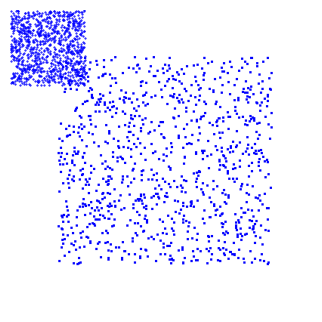

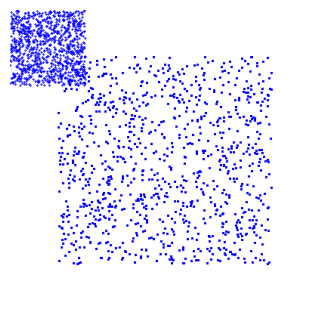

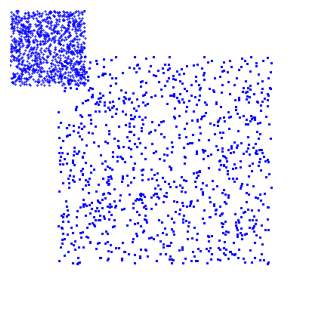

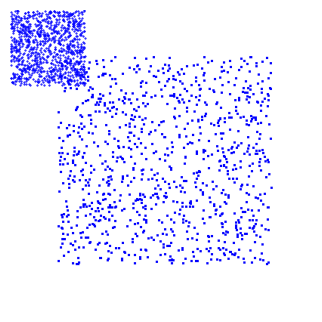

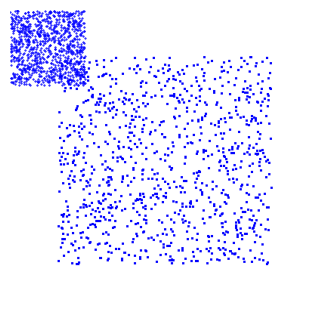

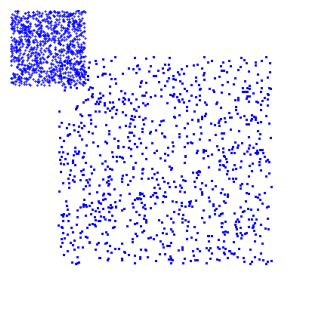

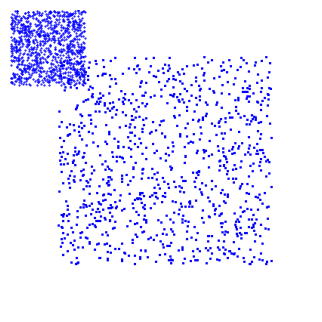

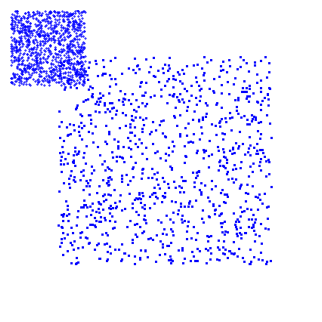

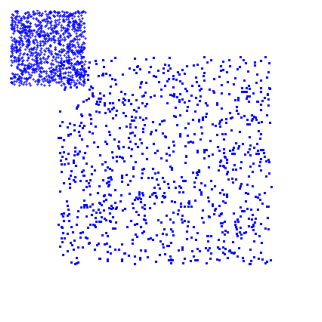

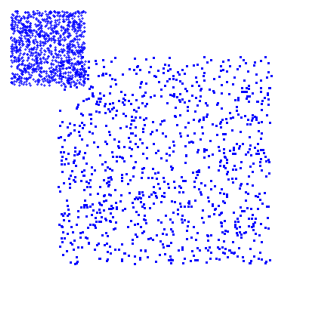

In [48]:
frameSize = (500, 500)
out = cv2.VideoWriter('output_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 60, frameSize)

for Iteration in range( MaxIterations ):

    ForeGroundParticleVx = ForeGroundVxInterp( (ForeGroundParticleY , ForeGroundParticleX) )
    ForeGroundParticleVy = ForeGroundVyInterp( (ForeGroundParticleY , ForeGroundParticleX) )

    BackGroundParticleVx = BackGroundVxInterp( (BackGroundParticleY , BackGroundParticleX) )
    BackGroundParticleVy = BackGroundVyInterp( (BackGroundParticleY , BackGroundParticleX) )


    ForeGroundParticleX = ForeGroundParticleX + dt * ForeGroundParticleVx
    ForeGroundParticleY = ForeGroundParticleY + dt * ForeGroundParticleVy

    BackGroundParticleX = BackGroundParticleX + dt * BackGroundParticleVx
    BackGroundParticleY = BackGroundParticleY + dt * BackGroundParticleVy

    ForeGroundParticleX = np.mod( ForeGroundParticleX , GridSize-1 )
    ForeGroundParticleY = np.mod( ForeGroundParticleY , GridSize-1 )

    BackGroundParticleX = np.mod( BackGroundParticleX , GridSize-1 )
    BackGroundParticleY = np.mod( BackGroundParticleY , GridSize-1 )

    if np.mod( Iteration , DisplayIteration )==0 :
        fig = plt.figure(figsize=(4,4), dpi=100)
        plt.plot( ForeGroundParticleX , ForeGroundParticleY , '.b' , markersize=1 )
        # plt.plot( BackGroundParticleX , BackGroundParticleY , '.r' , markersize=1 )
        # plt.axis('equal')
        # plt.show()
        plt.axis('off')
        fig.canvas.draw()

        # Now we can save it to a numpy array.
        data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        
        # plt.savefig('saved_figure.png',bbox_inches='tight',transparent=False,pad_inches = 0)
        # out.write(data)
        plt.imshow(data)
        plt.show()
    
out.release()

In [ ]:
import cv2

I = cv2.imread('saved_figure.png')
II = cv2.cvtColor( I , cv2.COLOR_BGR2GRAY)
plt.imshow( II )